In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\python\Dta science\Sales prediction\advertising.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
x=df[["TV","Radio","Newspaper"]]
y=df.Sales

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [8]:
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)


In [12]:
# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
accuracy = r2 * 100  # Convert R² to percentage
print(f"Model Accuracy: {accuracy:.2f}%")


Mean Absolute Error: 1.6587196157733977
Mean Squared Error: 4.178598801682463
R^2 Score: 0.8881441362855258
Model Accuracy: 88.81%


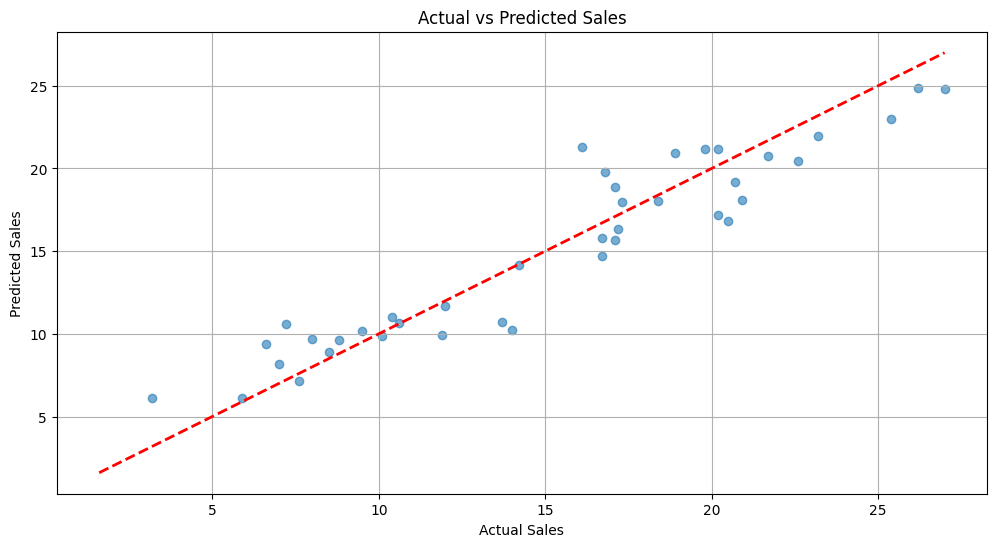

In [16]:
# Visualizations

# 1. Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid()
plt.show()


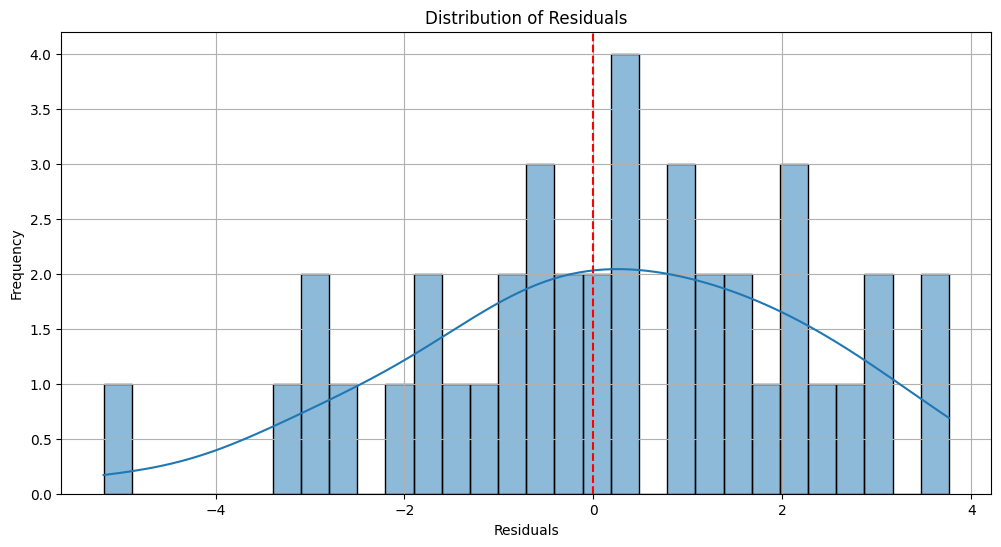

In [17]:
# 2. Residuals Plot
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--')  # Line at 0 for reference
plt.grid()
plt.show()
